In [17]:
import pandas as pd
import matplotlib.pyplot as plt

input_train = pd.read_csv('/home/usuario/Documentos/projetos/thyroid_disease_AI/thyroid_disease_AI/datasets/hypothyroid/input_train.csv')
output_train = pd.read_csv('/home/usuario/Documentos/projetos/thyroid_disease_AI/thyroid_disease_AI/datasets/hypothyroid/output_train.csv')


# calculater the means and standard deviations from input train
means = input_train.mean()
stds = input_train.std()

# Remove the standard scaling
input_train= (input_train * stds.values) + means.values



#without smote

input_train_unbalanced = pd.read_csv('/home/usuario/Documentos/projetos/thyroid_disease_AI/thyroid_disease_AI/datasets/hypothyroid/hypothyroid_features_final.csv')

output_train_unbalanced =  input_train_unbalanced['binaryClass']
input_train_unbalanced = input_train_unbalanced.drop(columns=['binaryClass'])   
columns = input_train_unbalanced.columns
# standardize the data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#input_train_unbalanced = scaler.fit_transform(input_train_unbalanced)
# transform to dataframe
#input_train_unbalanced = pd.DataFrame(input_train_unbalanced, columns=columns)

# print value counts
print(output_train['binaryClass'].value_counts())
print(output_train_unbalanced.value_counts())


binaryClass
0    2630
1    2629
Name: count, dtype: int64
binaryClass
1    3287
0     291
Name: count, dtype: int64


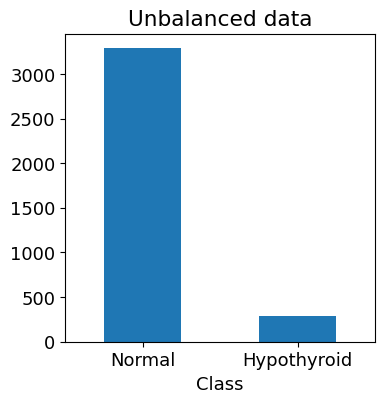

In [18]:
# unbalanced data 
# increase the size of font in the plot
plt.rcParams.update({'font.size': 13})
# include figure 
plt.figure(figsize=(4, 4))
output_train_unbalanced.value_counts().plot(kind='bar', title='Count (output)')
plt.xlabel('Class')
plt.title('Unbalanced data')
plt.xticks([0, 1], ['Normal', 'Hypothyroid'], rotation=0)
# save fig eps format
fig = plt.gcf()
fig.savefig('unbalanced_data.eps', format='eps', dpi=600, bbox_inches='tight')

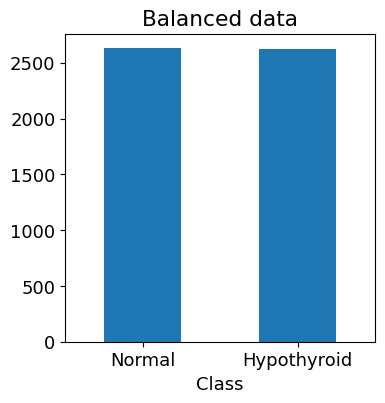

In [19]:
# after smote 
plt.figure(figsize=(4, 4))
output_train.value_counts().plot(kind='bar', title='Balanced data')
plt.xlabel('Class')
plt.xticks([0, 1], ['Normal', 'Hypothyroid'], rotation=0)
# save fig eps format
fig = plt.gcf()
fig.savefig('balanced_data.eps', format='eps', dpi=600, bbox_inches='tight')


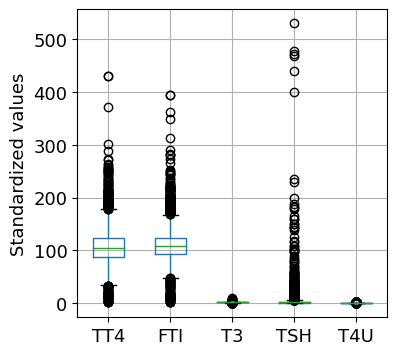

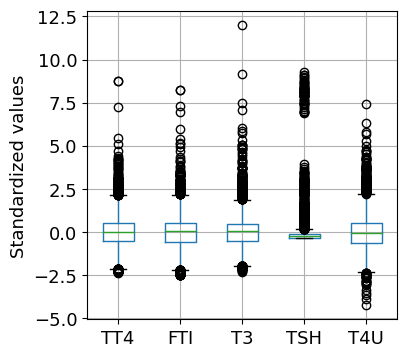

In [20]:
plt.figure(figsize=(4, 4))
# plot boxplot of features unbalanced remove features tt4 measured
input_train_unbalanced_plot = input_train_unbalanced.drop(columns=['TT4 measured', 'T4U measured', 'T3 measured', 'pregnant', 'I131 treatment'])
input_train_unbalanced_plot.boxplot()
plt.xticks(rotation=0)
plt.ylabel('Standardized values')
# save fig eps format
fig = plt.gcf()
fig.savefig('unbalanced_data_features.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()


plt.figure(figsize=(4, 4))
# plot boxplot of features after smote
input_train_plot = input_train.drop(columns=['TT4 measured', 'T4U measured', 'T3 measured', 'pregnant', 'I131 treatment'])
input_train_plot.boxplot()
plt.ylabel('Standardized values')
plt.xticks(rotation=0)
# save fig eps format
fig = plt.gcf()
fig.savefig('balanced_data_features.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


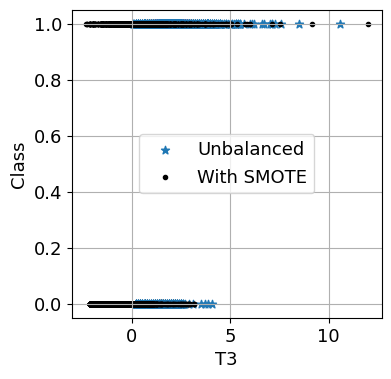

In [21]:
#scatter plot of output_train_unbalanced
plt.figure(figsize=(4, 4))
plt.scatter(input_train_unbalanced['T3'], output_train_unbalanced, marker='*')
plt.scatter(input_train['T3'], output_train, marker='.', color='black')
plt.legend(['Unbalanced', 'With SMOTE'], loc='center')
#plt.xlim(0, 10)
plt.xlabel('T3')
plt.ylabel('Class')
plt.grid()
# save figure  eps format 
fig = plt.gcf()
fig.savefig('T3.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


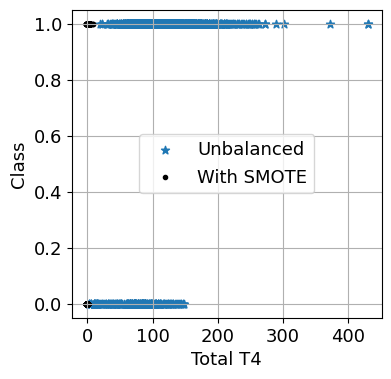

In [22]:
plt.figure(figsize=(4, 4))
plt.scatter(input_train_unbalanced['TT4'], output_train_unbalanced, marker='*')
plt.scatter(input_train['TT4'], output_train, marker='.', color='black')
plt.legend(['Unbalanced', 'With SMOTE'], loc='center')
#plt.xlim(0, 10)
plt.grid()
plt.xlabel('Total T4')
plt.ylabel('Class')
# save figure  eps format
fig = plt.gcf()
fig.savefig('TT4.eps', format='eps', dpi=600,  bbox_inches='tight')
plt.show()